In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow==2.1.0
!pip install pillow

distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_model_optimization as tfmot

In [2]:
print(tf.__version__)

2.4.1


In [2]:
train_dir = os.path.join('detecion')
train_a_dir = os.path.join(train_dir, 'a')
train_b_dir = os.path.join(train_dir, 'b')
train_c_dir = os.path.join(train_dir, 'c')
train_d_dir = os.path.join(train_dir, 'd')
train_e_dir = os.path.join(train_dir, 'e')
train_f_dir = os.path.join(train_dir, 'f')
train_g_dir = os.path.join(train_dir, 'g')
train_h_dir = os.path.join(train_dir, 'h')
train_i_dir = os.path.join(train_dir, 'i')
train_j_dir = os.path.join(train_dir, 'j')
train_k_dir = os.path.join(train_dir, 'k')
train_l_dir = os.path.join(train_dir, 'l')
train_m_dir = os.path.join(train_dir, 'm')
train_n_dir = os.path.join(train_dir, 'n')
train_o_dir = os.path.join(train_dir, 'o')
train_p_dir = os.path.join(train_dir, 'p')
train_q_dir = os.path.join(train_dir, 'q')
train_r_dir = os.path.join(train_dir, 'r')
train_s_dir = os.path.join(train_dir, 's')
train_t_dir = os.path.join(train_dir, 't')
train_u_dir = os.path.join(train_dir, 'u')
train_v_dir = os.path.join(train_dir, 'v')
train_w_dir = os.path.join(train_dir, 'w')
train_x_dir = os.path.join(train_dir, 'x')
train_y_dir = os.path.join(train_dir, 'y')
train_z_dir = os.path.join(train_dir, 'z')


In [4]:
train_a_fnames = os.listdir(train_a_dir)

print(train_a_fnames[:10])


['a.00690942-a0c5-11eb-9f03-9cb6d0638740.jpg', 'a.019f5386-a0c5-11eb-a233-9cb6d0638740.jpg', 'a.02d58724-a0c5-11eb-b47b-9cb6d0638740.jpg', 'a.040baa7e-a0c5-11eb-81d2-9cb6d0638740.jpg', 'a.054049da-a0c5-11eb-9f40-9cb6d0638740.jpg', 'a.06775c30-a0c5-11eb-9d18-9cb6d0638740.jpg', 'a.07acd5b4-a0c5-11eb-96cf-9cb6d0638740.jpg', 'a.08e34858-a0c5-11eb-8261-9cb6d0638740.jpg', 'a.0a185f76-a0c5-11eb-9cc4-9cb6d0638740.jpg', 'a.0b4dce58-a0c5-11eb-be77-9cb6d0638740.jpg']


In [5]:
print('Total imagenes a:', len(train_a_fnames))


Total imagenes a: 587


In [3]:
img_height = 160
img_width = 160
batch_size = 32
IMG_SIZE =(img_height,img_width)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')
validation_dataset = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(img_height,img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        subset='validation')



Found 12148 images belonging to 26 classes.
Found 3024 images belonging to 26 classes.


In [4]:

preprocess_input = (tf.keras.applications.mobilenet_v2.preprocess_input)
    

rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset = -1)


In [6]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape= IMG_SHAPE,
                                               include_top=False,
                                               weights= 'imagenet')

In [7]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [8]:
base_model.trainable = False

base_model.summary()


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [9]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [10]:
prediction_layer = tf.keras.layers.Dense(26,activation = 'softmax')
#prediction_layer = tfmot.quantization.keras.quantize_annotate_layer(prediction_layer)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 26)


In [11]:
drop = tf.keras.layers.Dropout(0.2)
drop = tfmot.quantization.keras.quantize_annotate_layer(drop)

In [14]:
inputs = tf.keras.Input(shape=(160,160,3))
x=preprocess_input(inputs)
x= base_model(x,training=False)
x=(global_average_layer)(x)
x=(tf.keras.layers.Dropout(0.2))(x)
outputs =(prediction_layer)(x)
model = tf.keras.Model(inputs,outputs)




In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [16]:

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 26)                3330

In [20]:
nb_epochs = 50
history = model.fit(
    train_dataset,
    steps_per_epoch= train_dataset.samples // batch_size,
    validation_data=validation_dataset,
    validation_steps= validation_dataset.samples // batch_size,
    epochs=nb_epochs)

Epoch 1/50
379/379 [==============================] - 208s 550ms/step - loss: 6.9328 - accuracy: 0.0974 - recall: 0.0713 - precision: 0.1050 - val_loss: 5.3581 - val_accuracy: 0.1097 - val_recall: 0.0672 - val_precision: 0.1306
Epoch 2/50
379/379 [==============================] - 210s 555ms/step - loss: 4.5053 - accuracy: 0.1838 - recall: 0.1373 - precision: 0.2153 - val_loss: 4.4702 - val_accuracy: 0.1828 - val_recall: 0.1187 - val_precision: 0.2261
Epoch 3/50
379/379 [==============================] - 210s 553ms/step - loss: 3.6412 - accuracy: 0.2665 - recall: 0.2084 - precision: 0.3160 - val_loss: 3.9662 - val_accuracy: 0.2314 - val_recall: 0.1536 - val_precision: 0.2891
Epoch 4/50
379/379 [==============================] - 213s 561ms/step - loss: 3.0937 - accuracy: 0.3244 - recall: 0.2636 - precision: 0.3845 - val_loss: 3.6523 - val_accuracy: 0.2593 - val_recall: 0.1922 - val_precision: 0.3418
Epoch 5/50
379/379 [==============================] - 212s 560ms/step - loss: 2.6897 - a

Epoch 37/50
379/379 [==============================] - 209s 552ms/step - loss: 0.4611 - accuracy: 0.8572 - recall: 0.8328 - precision: 0.8866 - val_loss: 1.6293 - val_accuracy: 0.6230 - val_recall: 0.5848 - val_precision: 0.6890
Epoch 38/50
379/379 [==============================] - 218s 576ms/step - loss: 0.4518 - accuracy: 0.8580 - recall: 0.8347 - precision: 0.8915 - val_loss: 1.6273 - val_accuracy: 0.6260 - val_recall: 0.5871 - val_precision: 0.6893
Epoch 39/50
379/379 [==============================] - 209s 551ms/step - loss: 0.4551 - accuracy: 0.8585 - recall: 0.8359 - precision: 0.8897 - val_loss: 1.6211 - val_accuracy: 0.6333 - val_recall: 0.5924 - val_precision: 0.6966
Epoch 40/50
379/379 [==============================] - 211s 556ms/step - loss: 0.4230 - accuracy: 0.8693 - recall: 0.8429 - precision: 0.8966 - val_loss: 1.6591 - val_accuracy: 0.6287 - val_recall: 0.5934 - val_precision: 0.6889
Epoch 41/50
379/379 [==============================] - 212s 559ms/step - loss: 0.418

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

rec = history.history['recall']
val_rec = history.history['val_recall']

prec= history.history['precision']
val_prec= history.history['val_precision']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))






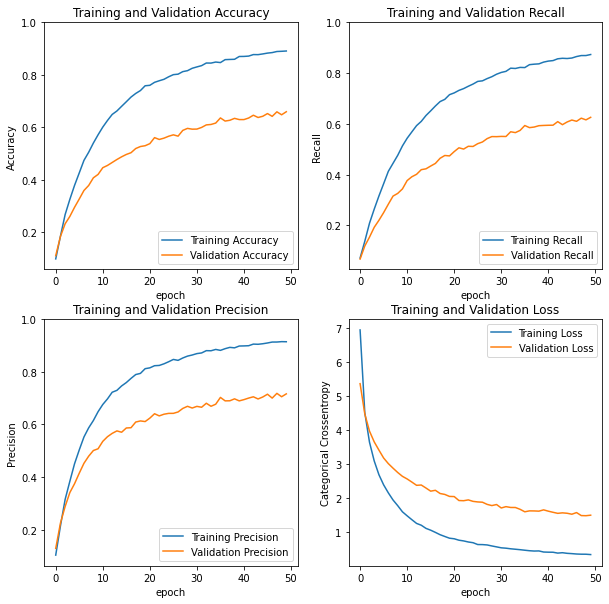

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

plt.subplot(2,2,2)
plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('epoch')

plt.subplot(2,2,3)
plt.plot(prec, label='Training Precision')
plt.plot(val_prec, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('epoch')

plt.subplot(2,2,4)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Crossentropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('Modelo_final')
plt.show()



In [24]:
print('Accuracy',acc[-1])
print('Validation Accuracy',val_acc[-1])

print('Recall',rec[-1])
print('Validation Recall',val_rec[-1])

print('Precision',prec[-1])
print('Validation Precision',val_prec[-1])

print('Loss',loss[-1])
print('Validation Loss',val_loss[-1])


Accuracy 0.8901452422142029
Validation Accuracy 0.6585771441459656
Recall 0.8727302551269531
Validation Recall 0.6253324747085571
Precision 0.9128108024597168
Validation Precision 0.715481162071228
Loss 0.3485186696052551
Validation Loss 1.502799153327942


In [51]:
from tensorflow.keras.preprocessing import image
from PIL import Image

ValueError: in user code:

    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 160, 160, 3), found shape=(None, 150, 150, 3)


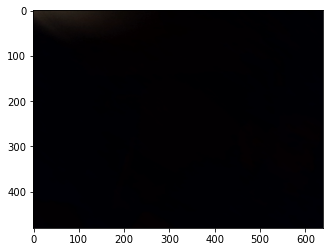

In [52]:
vc = cv2.VideoCapture(0)
plt.ion()

if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False

while is_capturing:
    try:
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_res = cv2.resize(frame, dsize=(150,150),interpolation=cv2.INTER_CUBIC)
        x=image.img_to_array(frame_res)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print("No Lleva mascara")
        else:
            print("Si lleva mascara")
        webcam_preview = plt.imshow(frame)
        try:
            plt.pause(1)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()
    

In [37]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\NICOLAS\AppData\Local\Temp\tmpm7pbcxfo\assets


INFO:tensorflow:Assets written to: C:\Users\NICOLAS\AppData\Local\Temp\tmpm7pbcxfo\assets


In [38]:
open("se_classifier_quant2.tflite","wb").write(tflite_model)

2740048